# Plotting in Julia

** @ CEF 2017** 

**Authors**: Chase Coleman and Spencer Lyon

**Date**: 27 June 2017

- Sort of a mixed bag
- Upside: many options, lots of flexibility

- Downside: many options, lots of flexibility

- Will introduce two options: 
    1. [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl): Julia interface to Python's [`matplotlib.pyplot`](http://matplotlib.org)
    2. [PlotlyJS.jl](http://spencerlyon.com/PlotlyJS.jl/): Interface to [plotly.js](https://plot.ly/javascript/)
- Alternatives
    - [Gadfly.jl](http://gadflyjl.org): Grammar of Graphics style plotting (similar to `ggplot2` from R)
    - [Plots.jl](https://juliaplots.github.io): API that leverages other packages to do plotting
    - [GLPlot.jl](https://github.com/SimonDanisch/GLPlot.jl): high performance GPU powered plotting
    - [GR.jl](https://github.com/jheinen/GR.jl): Julia interface to GR framework
    - ... others

## PyPlot.jl

- Julia interface to `matplotlib.pyplot`
- Very mature, robust, full-featured
- Main downside: sometimes feels a bit "clunky" or "unnatural" to use Python APIs from Julia

In [1]:
# Pkg.add("PyPlot")

### Basic PyPlot

INFO: Precompiling module PyPlot.


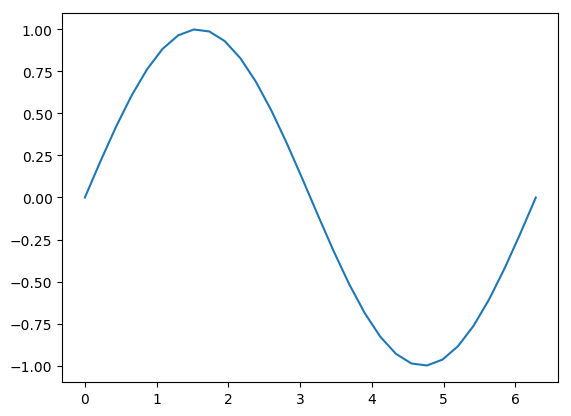

In [2]:
using PyPlot

x = linspace(0, 2π, 30)
plot(x, sin.(x));  # semi-colon supresses matplotlib text

typeof(ax) = Array{PyCall.PyObject,1}

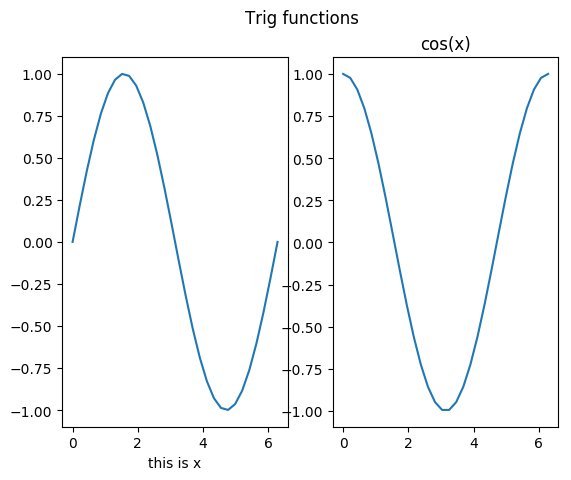

In [3]:
### using object API
# One row, two columns of subplots
fig, ax = subplots(1, 2)

# 1d array of matplotlib axes
@show typeof(ax)

# access methods of ax object using `[:name]` instead of `.name`

# plot on both axes
ax[1][:plot](x, sin.(x), label="sin")
ax[2][:plot](x, cos.(x), label="cos")

# set axes properties
ax[1][:set_xlabel]("this is x")
ax[2][:set_title]("cos(x)")

# set figure property
fig[:suptitle]("Trig functions");

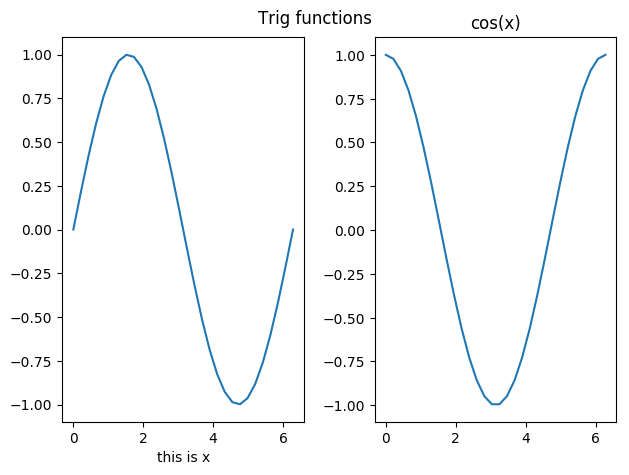

In [4]:
# fix spacing of axes labels
fig[:tight_layout]()

# display fig again by having it as last item in notebook cell
# (notice improved spacing)
fig 

### More than you need

- There are many matplotlib tutorials and examples online
- Any that use `matplotlib.pyplot` work with PyPlot.jl -- you just need to change `.stuff` to `[:stuff]`
- The ultimate reference for what is possible is the matplotlib documentation:
    - [API documentation](http://matplotlib.org/2.0.2/api/pyplot_summary.html) (Documentation for each function)
    - [Examples](http://matplotlib.org/2.0.2/examples/index.html)
    - [Gallery](http://matplotlib.org/2.0.2/gallery.html)
- Below are some examples (taken from [quantecon plotting lecture](https://lectures.quantecon.org/jl/julia_plots.html#pyplot))

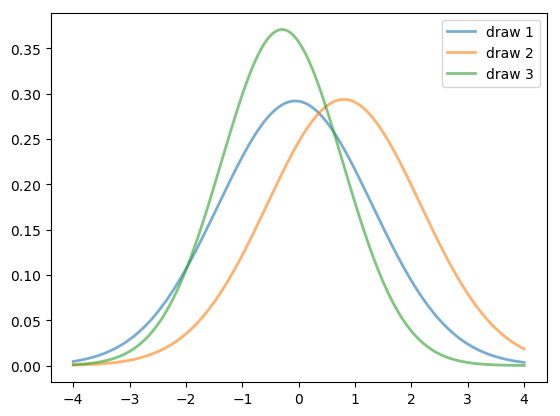

In [5]:
using Distributions

u = Uniform()

fig, ax = subplots()
x = linspace(-4, 4, 150)
for i in 1:3
    # == Compute normal pdf from randomly generated mean and std == #
    m, s = rand(u) * 2 - 1, rand(u) + 1
    d = Normal(m, s)
    y = pdf(d, x)
    # == Plot current pdf == #
    ax[:plot](x, y, linewidth=2, alpha=0.6, label="draw $i")
end
ax[:legend]();

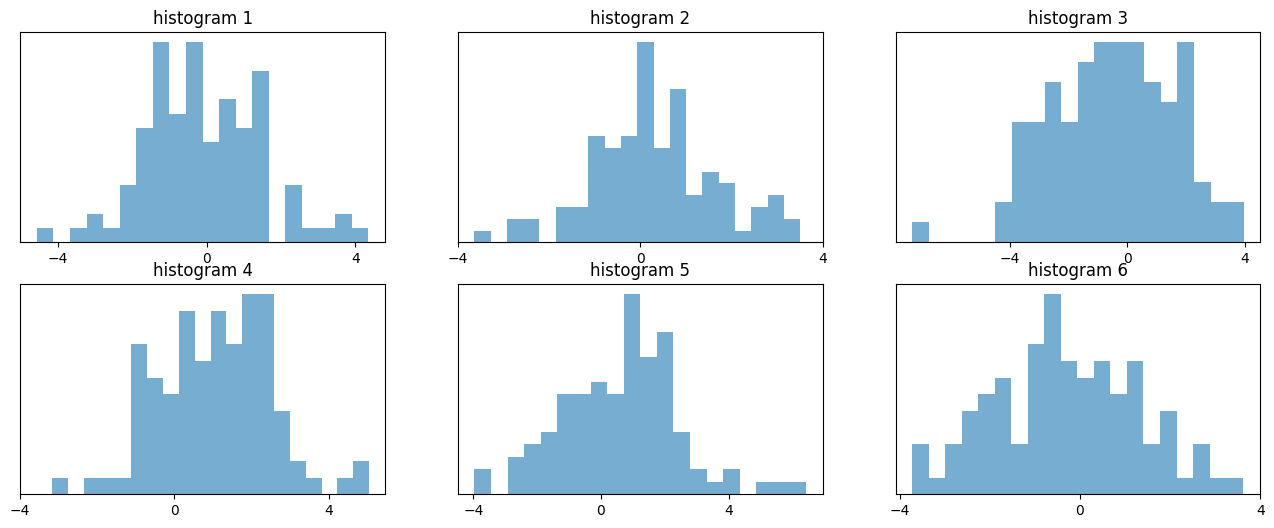

In [6]:
u = Uniform()
num_rows, num_cols = 2, 3
fig, axes = subplots(num_rows, num_cols, figsize=(16,6))
subplot_num = 0

for i in 1:num_rows
    for j in 1:num_cols
        ax = axes[i, j]
        subplot_num += 1
        # == Generate a normal sample with random mean and std == #
        m, s = rand(u) * 2 - 1, rand(u) + 1
        d = Normal(m, s)
        x = rand(d, 100)
        # == Histogram the sample == #
        ax[:hist](x, alpha=0.6, bins=20)
        ax[:set_title]("histogram $subplot_num")
        ax[:set_xticks]([-4, 0, 4])
        ax[:set_yticks]([])
    end
end

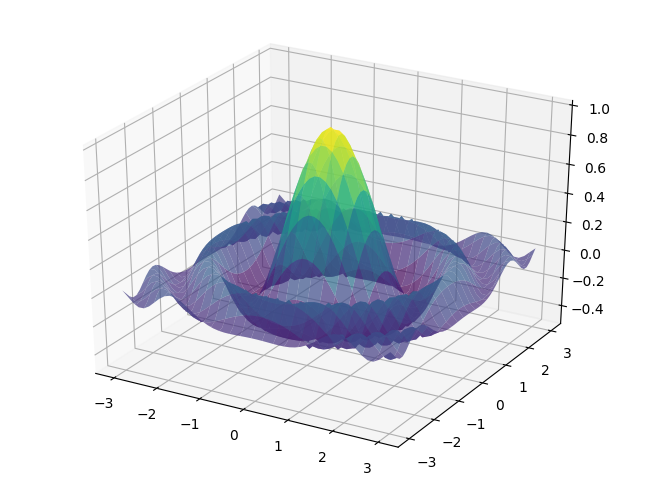

In [7]:
using QuantEcon: meshgrid

n = 50
x = linspace(-3, 3, n)
y = x

z = Array{Float64}(n, n)
f(x, y) = cos(x^2 + y^2) / (1 + x^2 + y^2)
for i in 1:n
    for j in 1:n
        z[j, i] = f(x[i], y[j])
    end
end

fig = figure(figsize=(8,6))
ax = fig[:gca](projection="3d")
ax[:set_zlim](-0.5, 1.0)
xgrid, ygrid = meshgrid(x, y)
ax[:plot_surface](
    xgrid, ygrid, z, rstride=2, cstride=2,
    cmap=ColorMap("viridis"), alpha=0.7, linewidth=0.25
);

In [8]:
# save the previous figure to pdf and eps
fig[:savefig]("3dplot.pdf")
fig[:savefig]("3dplot.eps")

## PlotlyJS.jl

- Julia interface to the  [plotly.js](https://plot.ly/javascript/) javascript library 
- Pros:
    - Comprehensive plotting routines
    - Interactive web graphics (easy to embed in website)
    - Plots are just JSON, so easy to save from HPC/server then reopen/edit later
    - Plot maps
- Cons:
    - Sometimes tricky to get everything talking nicely
    - Saving 3d images to pdf is low quality

In [9]:
# Pkg.add("PlotlyJS"); using PlotlyJS; PlotlyJS.Blink.AtomShell.install()

### PlotlyJS.jl basics

- Plots are made up of two things
    1. A list of traces. Each trace specifies one "thing" to be drawn and how to draw it. Examples:
        - `scatter`: (x, y) lines or markers in a certain color with line width
        - `choropleth`: what color each region should be, text label
        - `box`: x coordinates 
    2. A layout specification
        - Titles
        - Fonts/font sizes
        - Annotations
        - Multiple axes
- Then combine in the `plot` function: `plot([trace1, trace2], layout)`
- Call function `PlotlyJS.docs()` for a list of what is settable

**NOTE: restart notebook kernel here!!!**

Both PlotlyJS and PyPlot define functions with common names (e.g. `plot`, `scatter`, etc.) 

So that we can use PlotlyJS's without having to refer to them as `PlotlyJS.function_name` we will restart the notebook kernel (the Julia process backing the notebook)

To do this we go to the `Kernel` menu above and press `Restart`

In [1]:
using PlotlyJS
# PlotlyJS.docs()  # Loads help browser

In [2]:
# same examples as above
x = linspace(0, 2π, 30)
plot(x, sin.(x), name="sin")

In [3]:
# could also construct a scatter and layout
t1 = scatter(x=x, y=sin.(x), name="sin")
layout1 = Layout(font_size=18)
p1 = plot(t1, layout1)

In [4]:
# Can add layout proerties _after display_ using `relayout!`
# watch the plot above change
relayout!(p1, xaxis_title="this is x")

In [5]:
# to make subplots we pretend we are stacking in a matrix
p2 = plot(x, cos.(x), name="cos")

p12 = [p1 p2]

relayout!(p12, title="Trig functions")
p12

### More than you need

- Anything plotly.js can do, PlotlyJS.jl can do
- The ultimate reference on what is possible is the [plotly.js documentation](https://plot.ly/javascript/)
    - [Complete listing](https://plot.ly/javascript/reference)
    - [Examples](https://plot.ly/javascript/#fundamentals)
- Below are some examples taken from [PlotlyJS.jl documentation](http://spencerlyon.com/PlotlyJS.jl/)

In [6]:
function box9()
    xData = ["Carmelo<br>Anthony", "Dwyane<br>Wade", "Deron<br>Williams",
             "Brook<br>Lopez", "Damian<br>Lillard", "David<br>West",
             "Blake<br>Griffin", "David<br>Lee", "Demar<br>Derozan"]

    _getrandom(num, mul) = mul .* rand(num)

    yData = Array[
            _getrandom(30, 10),
            _getrandom(30, 20),
            _getrandom(30, 25),
            _getrandom(30, 40),
            _getrandom(30, 45),
            _getrandom(30, 30),
            _getrandom(30, 20),
            _getrandom(30, 15),
            _getrandom(30, 43)
        ]
    colors = ["rgba(93, 164, 214, 0.5)", "rgba(255, 144, 14, 0.5)",
              "rgba(44, 160, 101, 0.5)", "rgba(255, 65, 54, 0.5)",
              "rgba(207, 114, 255, 0.5)", "rgba(127, 96, 0, 0.5)",
              "rgba(255, 140, 184, 0.5)", "rgba(79, 90, 117, 0.5)",
              "rgba(222, 223, 0, 0.5)"]

    data = GenericTrace[]
    for i in 1:length(xData)
        trace = box(;y=yData[i],
                     name=xData[i],
                     boxpoints="all",
                     jitter=0.5,
                     whiskerwidth=0.2,
                     fillcolor="cls",
                     marker_size=2,
                     line_width=1)
        push!(data, trace)
    end

    t = "Points Scored by the Top 9 Scoring NBA Players in 2012 (fake data)"
    layout = Layout(;title=t,
                     yaxis=attr(autorange=true, showgrid=true, zeroline=true,
                                dtick=5, gridcolor="rgb(255, 255, 255)",
                                gridwidth=1,
                                zerolinecolor="rgb(255, 255, 255)",
                                zerolinewidth=2),
                     margin=attr(l=40, r=30, b=80, t=100),
                     paper_bgcolor="rgb(243, 243, 243)",
                     plot_bgcolor="rgb(243, 243, 243)",
                     showlegend=false)
    plot(data, layout)
end
box9()

In [7]:
# Pkg.add("Interact")
using Interact

In [8]:
t = linspace(-π, π, 300)
p = plot(t, [cos.(t) sin.(t)], line_width=3, Layout(yaxis_range=(-5, 5)))
display(p)
@manipulate for A in 0.1:0.1:5.0, f in 1.0:1.0:10.0, φ in 0:0.1:10, color1 in [:red, :pink, :orange]
    new_y1 = A .* cos.(2π .* f .* t .+ φ)
    new_y2 = A .* sin.(2π .* f .* t .+ φ)
    restyle!(p, y=(new_y1, new_y2))
    # only change color of second line (the sin one)
    restyle!(p, marker_color=color1, 2)
end
    

Interact.Options{:SelectionSlider,Float64}(1: "input" = 2.5 Float64 , "A", 2.5, "2.5", Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9,"1.0"=>1.0…), Dict(1.2=>"1.2",4.3=>"4.3",2.0=>"2.0",1.5=>"1.5",1.4=>"1.4",0.2=>"0.2",3.5=>"3.5",4.9=>"4.9",0.3=>"0.3",2.2=>"2.2"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 5.0 Float64 , "f", 5.0, "5.0", Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"2.0"=>2.0,"3.0"=>3.0,"4.0"=>4.0,"5.0"=>5.0,"6.0"=>6.0,"7.0"=>7.0,"8.0"=>8.0,"9.0"=>9.0,"10.0"=>10.0…), Dict(7.0=>"7.0",4.0=>"4.0",9.0=>"9.0",10.0=>"10.0",2.0=>"2.0",3.0=>"3.0",5.0=>"5.0",8.0=>"8.0",6.0=>"6.0",1.0=>"1.0"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Float64}(5: "input-3" = 5.0 Float64 , "φ", 5.0, "5.0", Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict(1.2=>"1.2",4.3=>"4.3",9.6=>"9.6",2.0=>"2.0",1.5=>"1.5",7.1=>"7.1",1.4=>"1.4",7.4=>"7.4",6.2=>"6.2",0.2=>"0.2"…)), Any[], Any[], true, "horizontal")

Interact.Options{:ToggleButtons,Symbol}(7: "input-4" = red Symbol , "color1", :red, "red", Interact.OptionDict(DataStructures.OrderedDict("red"=>:red,"pink"=>:pink,"orange"=>:orange), Dict(:red=>"red",:pink=>"pink",:orange=>"orange")), Any[], Any[], true, "horizontal")

nothing

In [12]:
function batman()
    # reference: https://github.com/alanedelman/18.337_2015/blob/master/Lecture01_0909/The%20Bat%20Curve.ipynb
    σ(x) = √(1-x.^2)
    el(x) = 3*σ.(x/7)
    s(x) = 4.2 - 0.5*x - 2.0*σ.(0.5*x-0.5)
    b(x) = σ.(abs.(2-x)-1) - x.^2/11 + 0.5x - 3
    c(x) = [1.7, 1.7, 2.6, 0.9]

    p(i, f; kwargs...) = scatter(;x=[-i; 0.0; i], y=[f(i); NaN; f(i)],
                                  marker_color="black", showlegend=false,
                                  kwargs...)
    traces = vcat(p(3:0.1:7, el; name="wings 1"),
                  p(4:0.1:7, t->-el(t); name="wings 2"),
                  p(1:0.1:3, s; name="Shoulders"),
                  p(0:0.1:4, b; name="Bottom"),
                  p([0, 0.5, 0.8, 1], c; name="head"))

    plot(traces, Layout(title="Batman"))
end
batman()

In [13]:
use_style!(:tomorrow_night_eighties)
plot([sin, cos, sinc], -4, 4)

In [14]:
plot([sin, cos, sinc], -4, 4, style=style(:ggplot))